In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

In [10]:
df = pd.read_csv('data.csv')

In [11]:
def average_defects(df):
    for sup, gr in df.groupby('supplier'):
        produced = gr['produced'].sum()
        defects = gr['defects'].sum()
        print('supplier: %s' % sup)
        print('   produced: %d' % produced)
        print('   defects: %d' % defects)
        print('   defects percent: %f' % (defects / produced * 100))
        
average_defects(df)

supplier: harpy.co
   produced: 31532
   defects: 6080
   defects percent: 19.281999
supplier: westeros.inc
   produced: 31625
   defects: 8268
   defects percent: 26.143874


In [12]:
def get_daily_statistic(df):
    ser = pd.Series([])
    for date, gr in df.groupby('report.date'):
        ser[date] = gr['produced'].sum() - gr['defects'].sum()

    j = 0
    for i in ser.index:
        if i > ser.index[0]:
            ser[i] += ser[j]
        j = i
    return ser

In [13]:
def daily_analyze(df):
    global daily_available
    global supplier
    i = 0
    maxy = 0
    
    plt.figure(1, figsize=(10, 10))
    plt.subplot(211)

    for sup, gr in df.groupby('supplier'):
        supplier += [sup]
        ser = get_daily_statistic(gr)
        daily_available[sup] = ser
        print('supplier: %s' % sup)
        print('daily number of weapons:')
        print(ser)
        x = ser.index
        plt.xlim(0, ser.index[-1] + 1)
        plt.plot(ser.index, ser, colors[i] + 'o', ser.index, ser, 'k')
        maxy = max(maxy, ser.max())
        i += 1
    
    

    plt.ylim(0, maxy * 1.1)
    plt.xlabel('day\n%s: red, %s: blue' % (supplier[0], supplier[1]))
    plt.ylabel('number available weapon')
    
    plt.savefig('figures/daily_analyze.png', bbox_inches='tight')
    plt.show()
    

supplier: harpy.co
daily number of weapons:
1     5248
2    10378
3    15353
4    20233
5    24296
6    27779
7    25452
dtype: float64
supplier: westeros.inc
daily number of weapons:
1     5280
2    10103
3    14549
4    18544
5    22234
6    25546
7    23357
dtype: float64


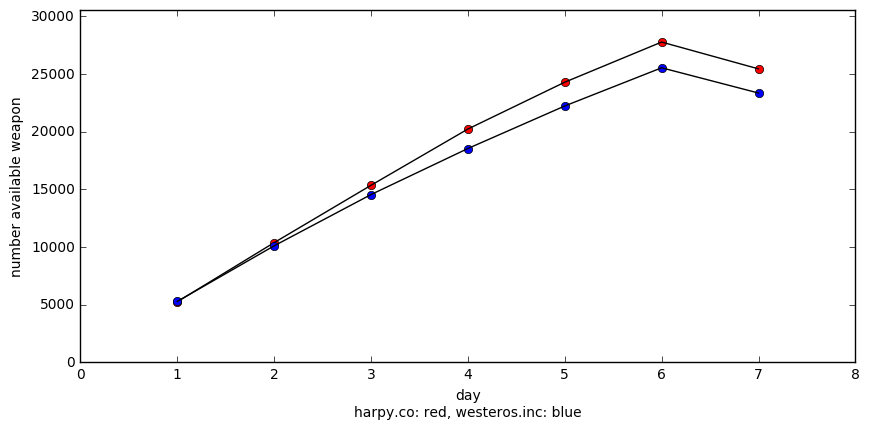

In [14]:
daily_available = dict()
supplier = []
colors = ['r', 'b']
daily_analyze(df)

In [15]:
def get_daily_defects(df):
    ser = pd.Series([])
    for date, gr in df.groupby('report.date'):
        ser[date] = gr['defects'].sum()

    return ser

In [16]:
def daily_defects(df):
    i = 0
    maxy = 0
    
    plt.figure(1, figsize=(10, 5))
    plt.subplot(211)

    for sup, gr in df.groupby('supplier'):
        ser = get_daily_defects(gr)
        d_defects[sup] = ser
        print('sup: %s' % sup)
        print('ser:')
        print(ser)
        x = ser.index
        plt.xlim(0, ser.index[-1] + 1)
        plt.plot(ser.index, ser, colors[i] + 'o')
        maxy = max(maxy, ser.max())
        i += 1
    
    plt.ylim(0, maxy * 1.1)
    plt.xlabel('day\n%s: red, %s: blue' % (supplier[0], supplier[1]))
    plt.ylabel('number defects')
    
    plt.savefig('figures/daily_defects.png', bbox_inches='tight')
    plt.show()    

sup: harpy.co
ser:
1       0
2     126
3     268
4     402
5    1180
6    1777
7    2327
dtype: float64
sup: westeros.inc
ser:
1       0
2     449
3     852
4    1290
5    1573
6    1915
7    2189
dtype: float64


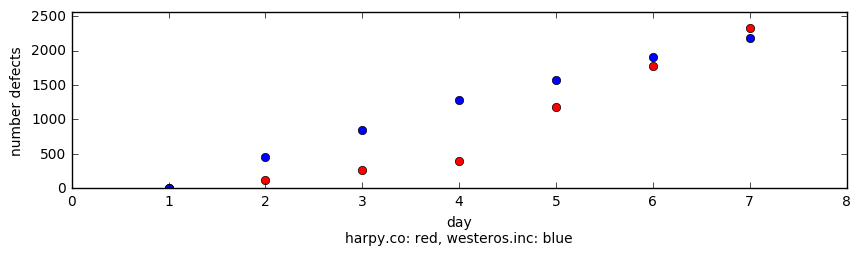

In [17]:
d_defects = dict()
daily_defects(df)

In [18]:
def daily_defects_percent():
    i = 0
    maxy = 0
    
    plt.figure(1, figsize=(10, 5))
    plt.subplot(211)


    
    for sup in supplier:
        ser = 100 * d_defects[sup] / (daily_available[sup] + d_defects[sup])
    
        print('sup: %s' % sup)
        print('ser:')
        print(ser)
        x = ser.index
        plt.xlim(0, ser.index[-1] + 1)
        plt.plot(ser.index, ser, colors[i] + 'o')
        i += 1
        
    plt.ylim(0, 20)
    plt.xlabel('day\n%s: red, %s: blue' % (supplier[0], supplier[1]))
    plt.ylabel('percent defects')
    
    plt.savefig('figures/daily_defects_percent.png', bbox_inches='tight')
    plt.show()   

sup: harpy.co
ser:
1    0.000000
2    1.199543
3    1.715639
4    1.948146
5    4.631810
6    6.012316
7    8.376831
dtype: float64
sup: westeros.inc
ser:
1    0.000000
2    4.255118
3    5.532108
4    6.503983
5    6.607300
6    6.973526
7    8.568856
dtype: float64


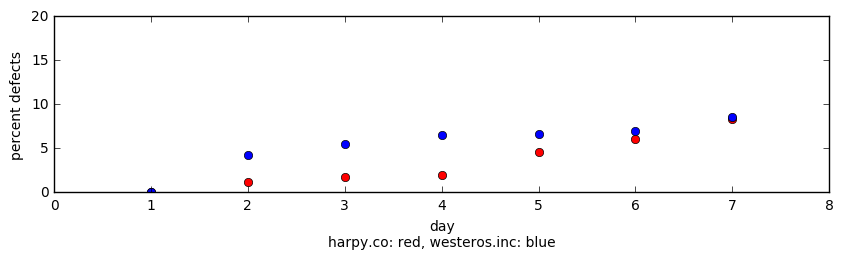

In [19]:
daily_defects_percent()